# Trabalho da disciplina Projeto/MVP em Análise de Dados e Boas Práticas

## Aluno: Luis Eduardo Ribeiro Veiga - RA: 40520223000855

## Notebook apresentando as fases: Definição do problema; Coleta e análise de dados; e Pré-processamento de um projeto de ciência de dados.

**Descrição do Problema** - Criar um notebook apresentando as fases de definição do problema, coleta e análise de dados, e pré-processamento do dataset 'Productivity Prediction of Garment Employees'.

**Dataset** - O dataset inclui atributos do processo de fabricação de vestuário e a produtividade dos trabalhadores. A indústria do vestuário faz uso intensivo de mão de obra, com muitos processos sendo executados de forma manual. O atendimento da alta procura de produtos de vestuário depende do desempenho da produção e entrega dos trabalhores das empresas dessa indústria. Por conta disso, os tomadores de decisão na indústria de vestuário, desejam registrar, analisar e prever a produtividade dos funcionários de suas fábricas. O dataset pode ser utilizado para fins de regressão ou de classificação.

O dataset é composto de 1197 instâncias e 15 atributos.

Link para acessar o dataset - http://archive.ics.uci.edu/dataset/597/productivity+prediction+of+garment+employees

### Definição do Problema

----------- INCLUIR DEFINICAO DO PROBLEMA

### Importação de bibliotecas

In [37]:
# Configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

# Imports necessários
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import urllib.request
import ssl
import missingno as ms 
from urllib.parse import quote
from io import StringIO, BytesIO, TextIOWrapper
from zipfile import ZipFile

### Carga do dataset

In [38]:
# Carrega o arquivo zip a partir da url, descompacta o arquivo e cria o dataset
uci_url = 'https://archive.ics.uci.edu/static/public/597/'
productivity_prediction_file = 'productivity+prediction+of+garment+employees.zip'
context = ssl._create_unverified_context()
request = urllib.request.urlopen(uci_url + urllib.parse.quote(productivity_prediction_file),context=context)
zipfile = ZipFile(BytesIO(request.read()))
filepath = TextIOWrapper(zipfile.open('garments_worker_productivity.csv'), encoding='utf-8')
dataset = pd.read_csv(filepath, sep=',')

### Análise Exploratória de Dados

#### Informações sobre o dataset.

In [39]:
# Exibe as dimensões do dataset
dataset.shape

(1197, 15)

In [40]:
# Exibe a estrutura do dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

In [41]:
# Exibe as primeiras linhas do dataset
dataset.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


In [42]:
# Exibe as últimas linhas do dataset
dataset.tail()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
1192,3/11/2015,Quarter2,finishing,Wednesday,10,0.75,2.9,NaN,960,0,0.0,0,0,8.0,0.628333
1193,3/11/2015,Quarter2,finishing,Wednesday,8,0.70,3.9,NaN,960,0,0.0,0,0,8.0,0.625625
1194,3/11/2015,Quarter2,finishing,Wednesday,7,0.65,3.9,NaN,960,0,0.0,0,0,8.0,0.625625
1195,3/11/2015,Quarter2,finishing,Wednesday,9,0.75,2.9,NaN,1800,0,0.0,0,0,15.0,0.505889
1196,3/11/2015,Quarter2,finishing,Wednesday,6,0.70,2.9,NaN,720,0,0.0,0,0,6.0,0.394722


In [43]:
# Exibe estatísticas básicas para atributos do dataset
dataset.describe()

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
count,1197.000000,1197.000000,1197.000000,691.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
mean,6.426901,0.729632,15.062172,1190.465991,4567.460317,38.210526,0.730159,0.369256,0.150376,34.609858,0.735091
std,3.463963,0.097891,10.943219,1837.455001,3348.823563,160.182643,12.709757,3.268987,0.427848,22.197687,0.174488
min,1.000000,0.070000,2.900000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.233705
25%,3.000000,0.700000,3.940000,774.500000,1440.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.650307
50%,6.000000,0.750000,15.260000,1039.000000,3960.000000,0.000000,0.000000,0.000000,0.000000,34.000000,0.773333
75%,9.000000,0.800000,24.260000,1252.500000,6960.000000,50.000000,0.000000,0.000000,0.000000,57.000000,0.850253
max,12.000000,0.800000,54.560000,23122.000000,25920.000000,3600.000000,300.000000,45.000000,2.000000,89.000000,1.120437


#### Descrição dos atributos do dataset.

| Atributo | Descrição |
   |---|---|
   | date | Data no formato MM-DD-YYYY. |
   | quarter | Divisão do mês em quartos. |
   | department | Departamento associado à instância. |
   | day | Dia da semana. |
   | team | Número da equipe de trabalhadores associado à instância. |
   | targeted_productivity | Produtividade desejada para cada equipe para cada dia. |
   | smv | Tempo alocado para uma tarefa em minutos. |
   | wip | Trabalho em progresso. Inclui o número de itens pendentes para um produto. |
   | over_time | Quantidade de tempo excedido para cada equipe em minutos. |
   | incentive | Quantidade de incentivo financeiro para execução de determinada tarefa. |
   | idle_time | Quantidade de tempo de produção interrompida. |
   | idle_men | Número de trabalhadores ociosos devido a interrupção na produção. |
   | no_of_style_change | Número de modificações no estilo de determinado produto. |
   | no_of_workers | Número de trabalhadores em cada equipe. |
   | actual_productivity | O percentual real de produtividade dos trabalhadores. |

#### Visualização da distribuição dos atributos.

Exibe o número de instâncias por tipo/valor para os atributos do dataset.

In [44]:
# Exibe o número de instâncias por tipo do atributo quarter
dataset['quarter'].value_counts()

quarter
Quarter1    360
Quarter2    335
Quarter4    248
Quarter3    210
Quarter5     44
Name: count, dtype: int64

In [45]:
# Exibe o número de instâncias por tipo do atributo day
dataset['day'].value_counts()

day
Wednesday    208
Sunday       203
Tuesday      201
Thursday     199
Monday       199
Saturday     187
Name: count, dtype: int64

In [46]:
# Exibe o número de instâncias por tipo do atributo department
dataset['department'].value_counts()

department
sweing        691
finishing     257
finishing     249
Name: count, dtype: int64

In [47]:
# Pode-se perceber pelos valores acima que o departamento finishing está duplicado, 
# isto ocorre pela presença de um branco no final de alguns itens da amostra, 
# o código abaixo faz a junção do itens num único department finishing.
dataset['department'] = dataset['department'].apply(lambda x: 'finishing' if x.replace(" ","") == 'finishing' else 'sewing' )

In [48]:
# Verificando o resultado da junção feita acima
dataset['department'].value_counts()

department
sewing       691
finishing    506
Name: count, dtype: int64

In [49]:
# Exibe o número de instâncias por tipo do atributo team
dataset['team'].value_counts()

team
8     109
2     109
1     105
4     105
9     104
10    100
12     99
7      96
3      95
6      94
5      93
11     88
Name: count, dtype: int64

In [50]:
# Conta o número de instâncias para cada valor do atributo targeted_productivity
dataset['targeted_productivity'].value_counts()

targeted_productivity
0.80    540
0.70    242
0.75    216
0.65     63
0.60     57
0.50     49
0.35     27
0.40      2
0.07      1
Name: count, dtype: int64

In [51]:
# Conta o número de instâncias para cada valor do atributo smv
dataset['smv'].value_counts()

smv
3.94     192
2.90     108
22.52    103
30.10     79
4.15      76
        ... 
48.68      1
54.56      1
41.19      1
49.10      1
40.99      1
Name: count, Length: 70, dtype: int64

In [52]:
# Conta o número de instâncias para cada valor do atributo wip
dataset['wip'].value_counts()

wip
1039.0    5
1282.0    4
1263.0    3
1216.0    3
1069.0    3
         ..
1635.0    1
1519.0    1
1337.0    1
1118.0    1
914.0     1
Name: count, Length: 548, dtype: int64

In [53]:
# Conta o número de instâncias para cada valor do atributo over_time
dataset['over_time'].value_counts()

over_time
960      129
1440     111
6960      61
6840      48
1200      39
        ... 
4140       1
12180      1
10770      1
12000      1
3120       1
Name: count, Length: 143, dtype: int64

In [54]:
# Conta o número de instâncias para cada valor do atributo incentive
dataset['incentive'].value_counts()

incentive
0       604
50      113
63       61
45       54
30       52
23       38
38       29
60       28
40       27
75       24
113      21
88       19
34       17
56       14
26        9
100       7
55        7
81        7
69        6
65        6
70        6
35        5
960       5
94        4
44        4
90        3
24        2
27        2
49        2
119       2
46        2
1080      1
1440      1
2880      1
3600      1
32        1
1200      1
62        1
98        1
33        1
138       1
93        1
53        1
29        1
21        1
37        1
54        1
25        1
Name: count, dtype: int64

In [55]:
# Conta o número de instâncias para cada valor do atributo idle_time
dataset['idle_time'].value_counts()

idle_time
0.0      1179
3.5         3
2.0         2
5.0         2
8.0         2
4.5         2
4.0         2
90.0        1
150.0       1
270.0       1
300.0       1
6.5         1
Name: count, dtype: int64

In [56]:
# Conta o número de instâncias para cada valor do atributo idle_men
dataset['idle_men'].value_counts()

idle_men
0     1179
10       3
15       3
30       3
20       3
35       2
45       1
37       1
25       1
40       1
Name: count, dtype: int64

In [57]:
# Conta o número de instâncias para cada valor do atributo no_of_style_change
dataset['no_of_style_change'].value_counts()

no_of_style_change
0    1050
1     114
2      33
Name: count, dtype: int64

In [58]:
# Conta o número de instâncias para cada valor do atributo no_of_workers
dataset['no_of_workers'].value_counts()

no_of_workers
8.0     262
58.0    114
57.0    109
59.0     75
10.0     60
       ... 
51.5      1
28.0      1
21.0      1
4.0       1
6.0       1
Name: count, Length: 61, dtype: int64

In [59]:
# Conta o número de instâncias para cada valor do atributo actual_productivity
dataset['actual_productivity'].value_counts()

actual_productivity
0.800402    24
0.971867    12
0.850137    12
0.750651    11
0.850502    11
            ..
0.800034     1
0.800024     1
0.769293     1
0.750031     1
0.394722     1
Name: count, Length: 879, dtype: int64

Exibe a distribuição dos atributos.

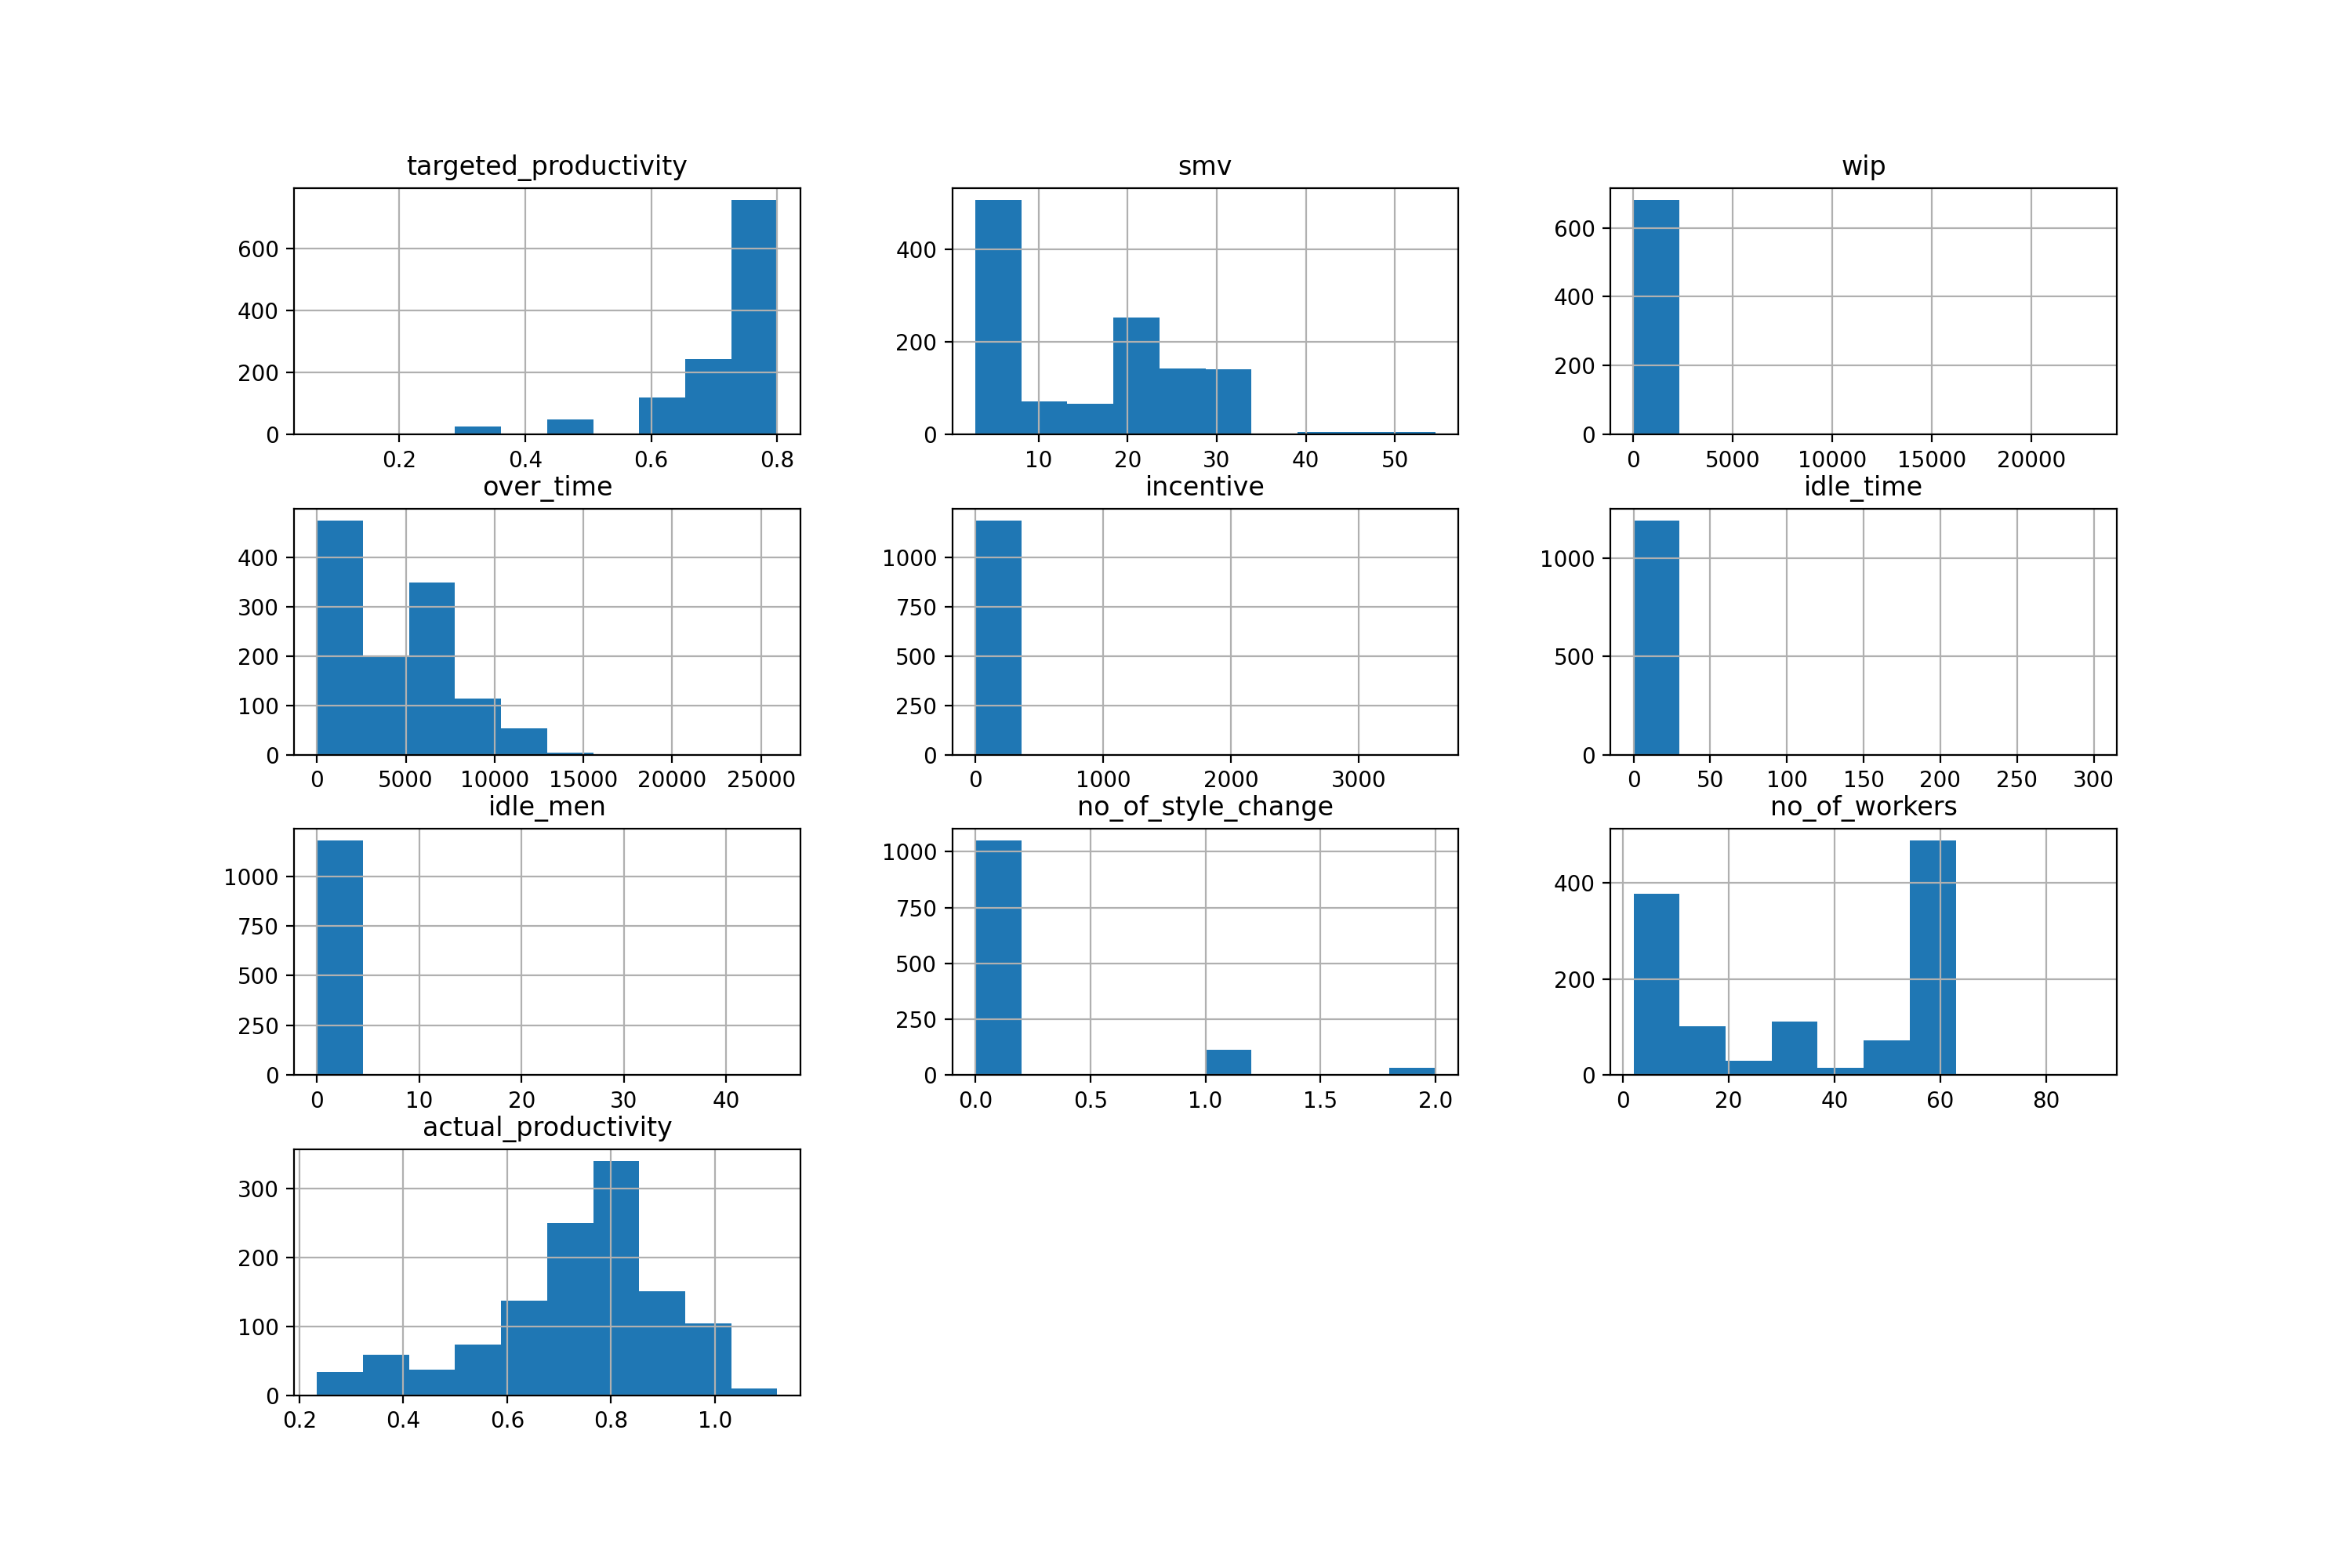

In [60]:
# Exibe a distribuição dos atributos utilizando histogramas
dataset[['targeted_productivity',
         'smv',
         'wip',
         'over_time',
         'incentive',
         'idle_time',
         'idle_men',
         'no_of_style_change',
         'no_of_workers',
         'actual_productivity']].hist(figsize = (15,10))
plt.show()

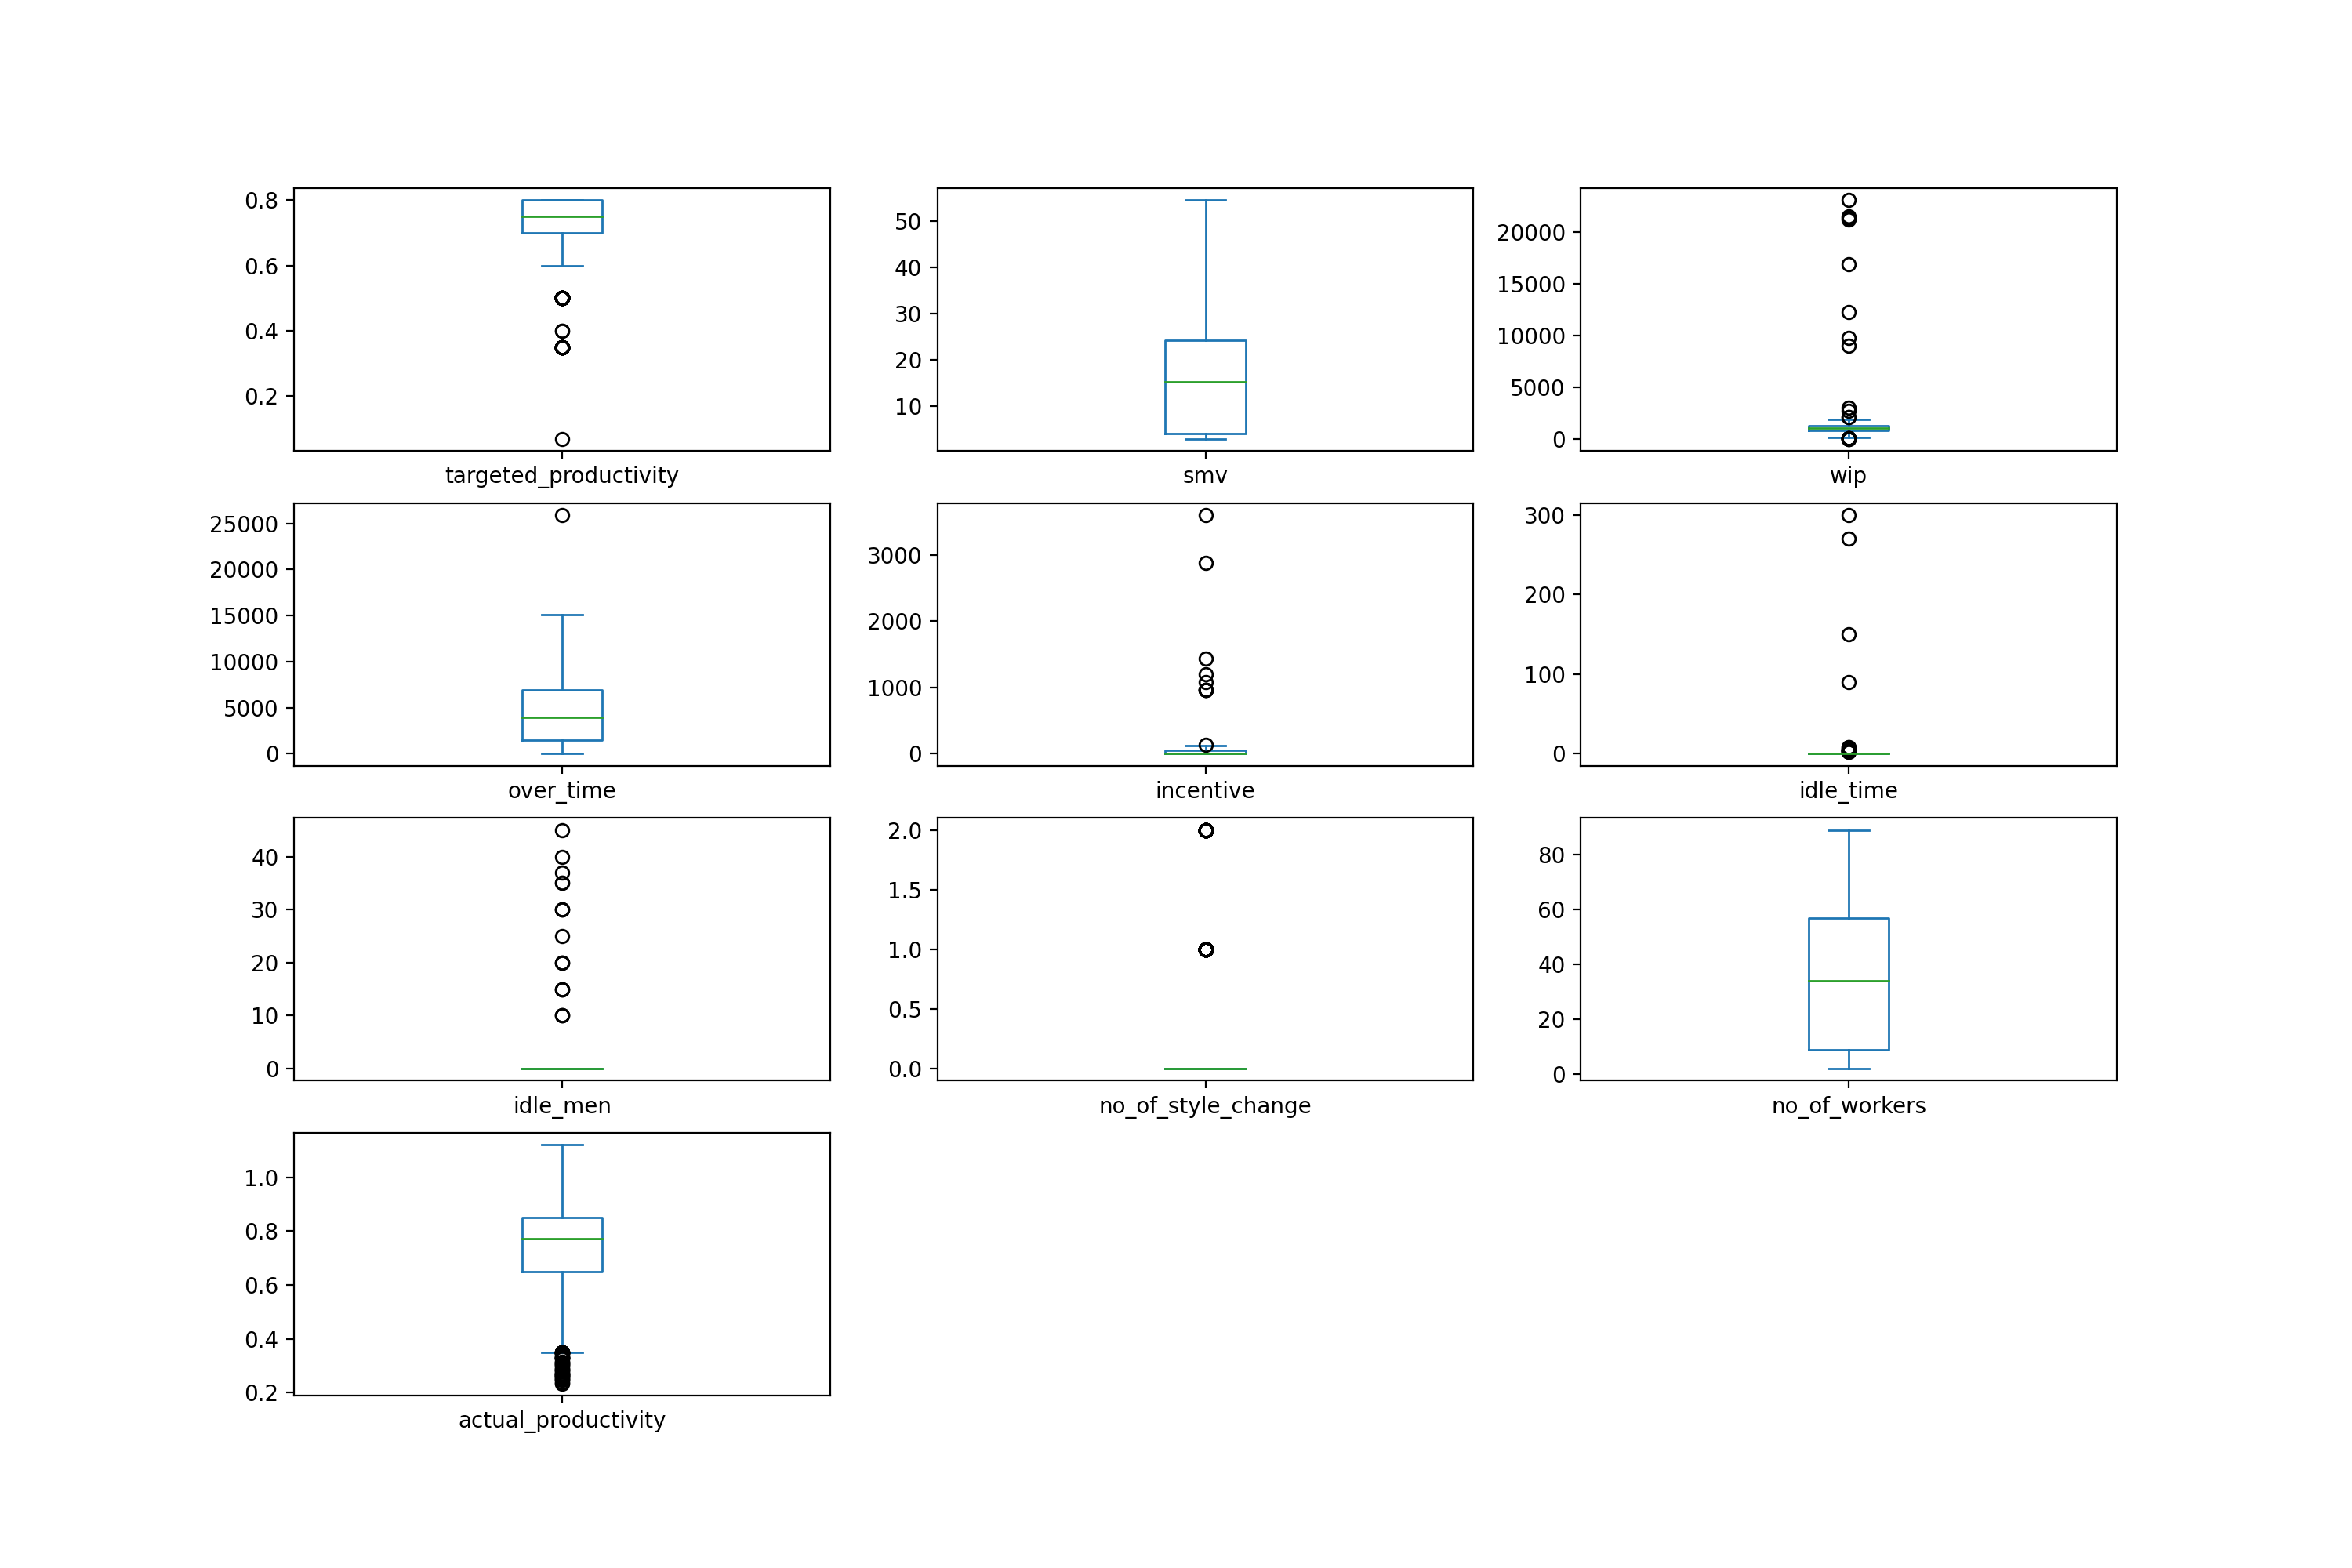

In [61]:
# Exibe a distribuição dos atributos utilizando boxplots
dataset[['targeted_productivity',
         'smv',
         'wip',
         'over_time',
         'incentive',
         'idle_time',
         'idle_men',
         'no_of_style_change',
         'no_of_workers',
         'actual_productivity']].plot(kind = 'box', subplots = True, layout = (4,3), sharey = False, figsize = (15,10))
plt.show()

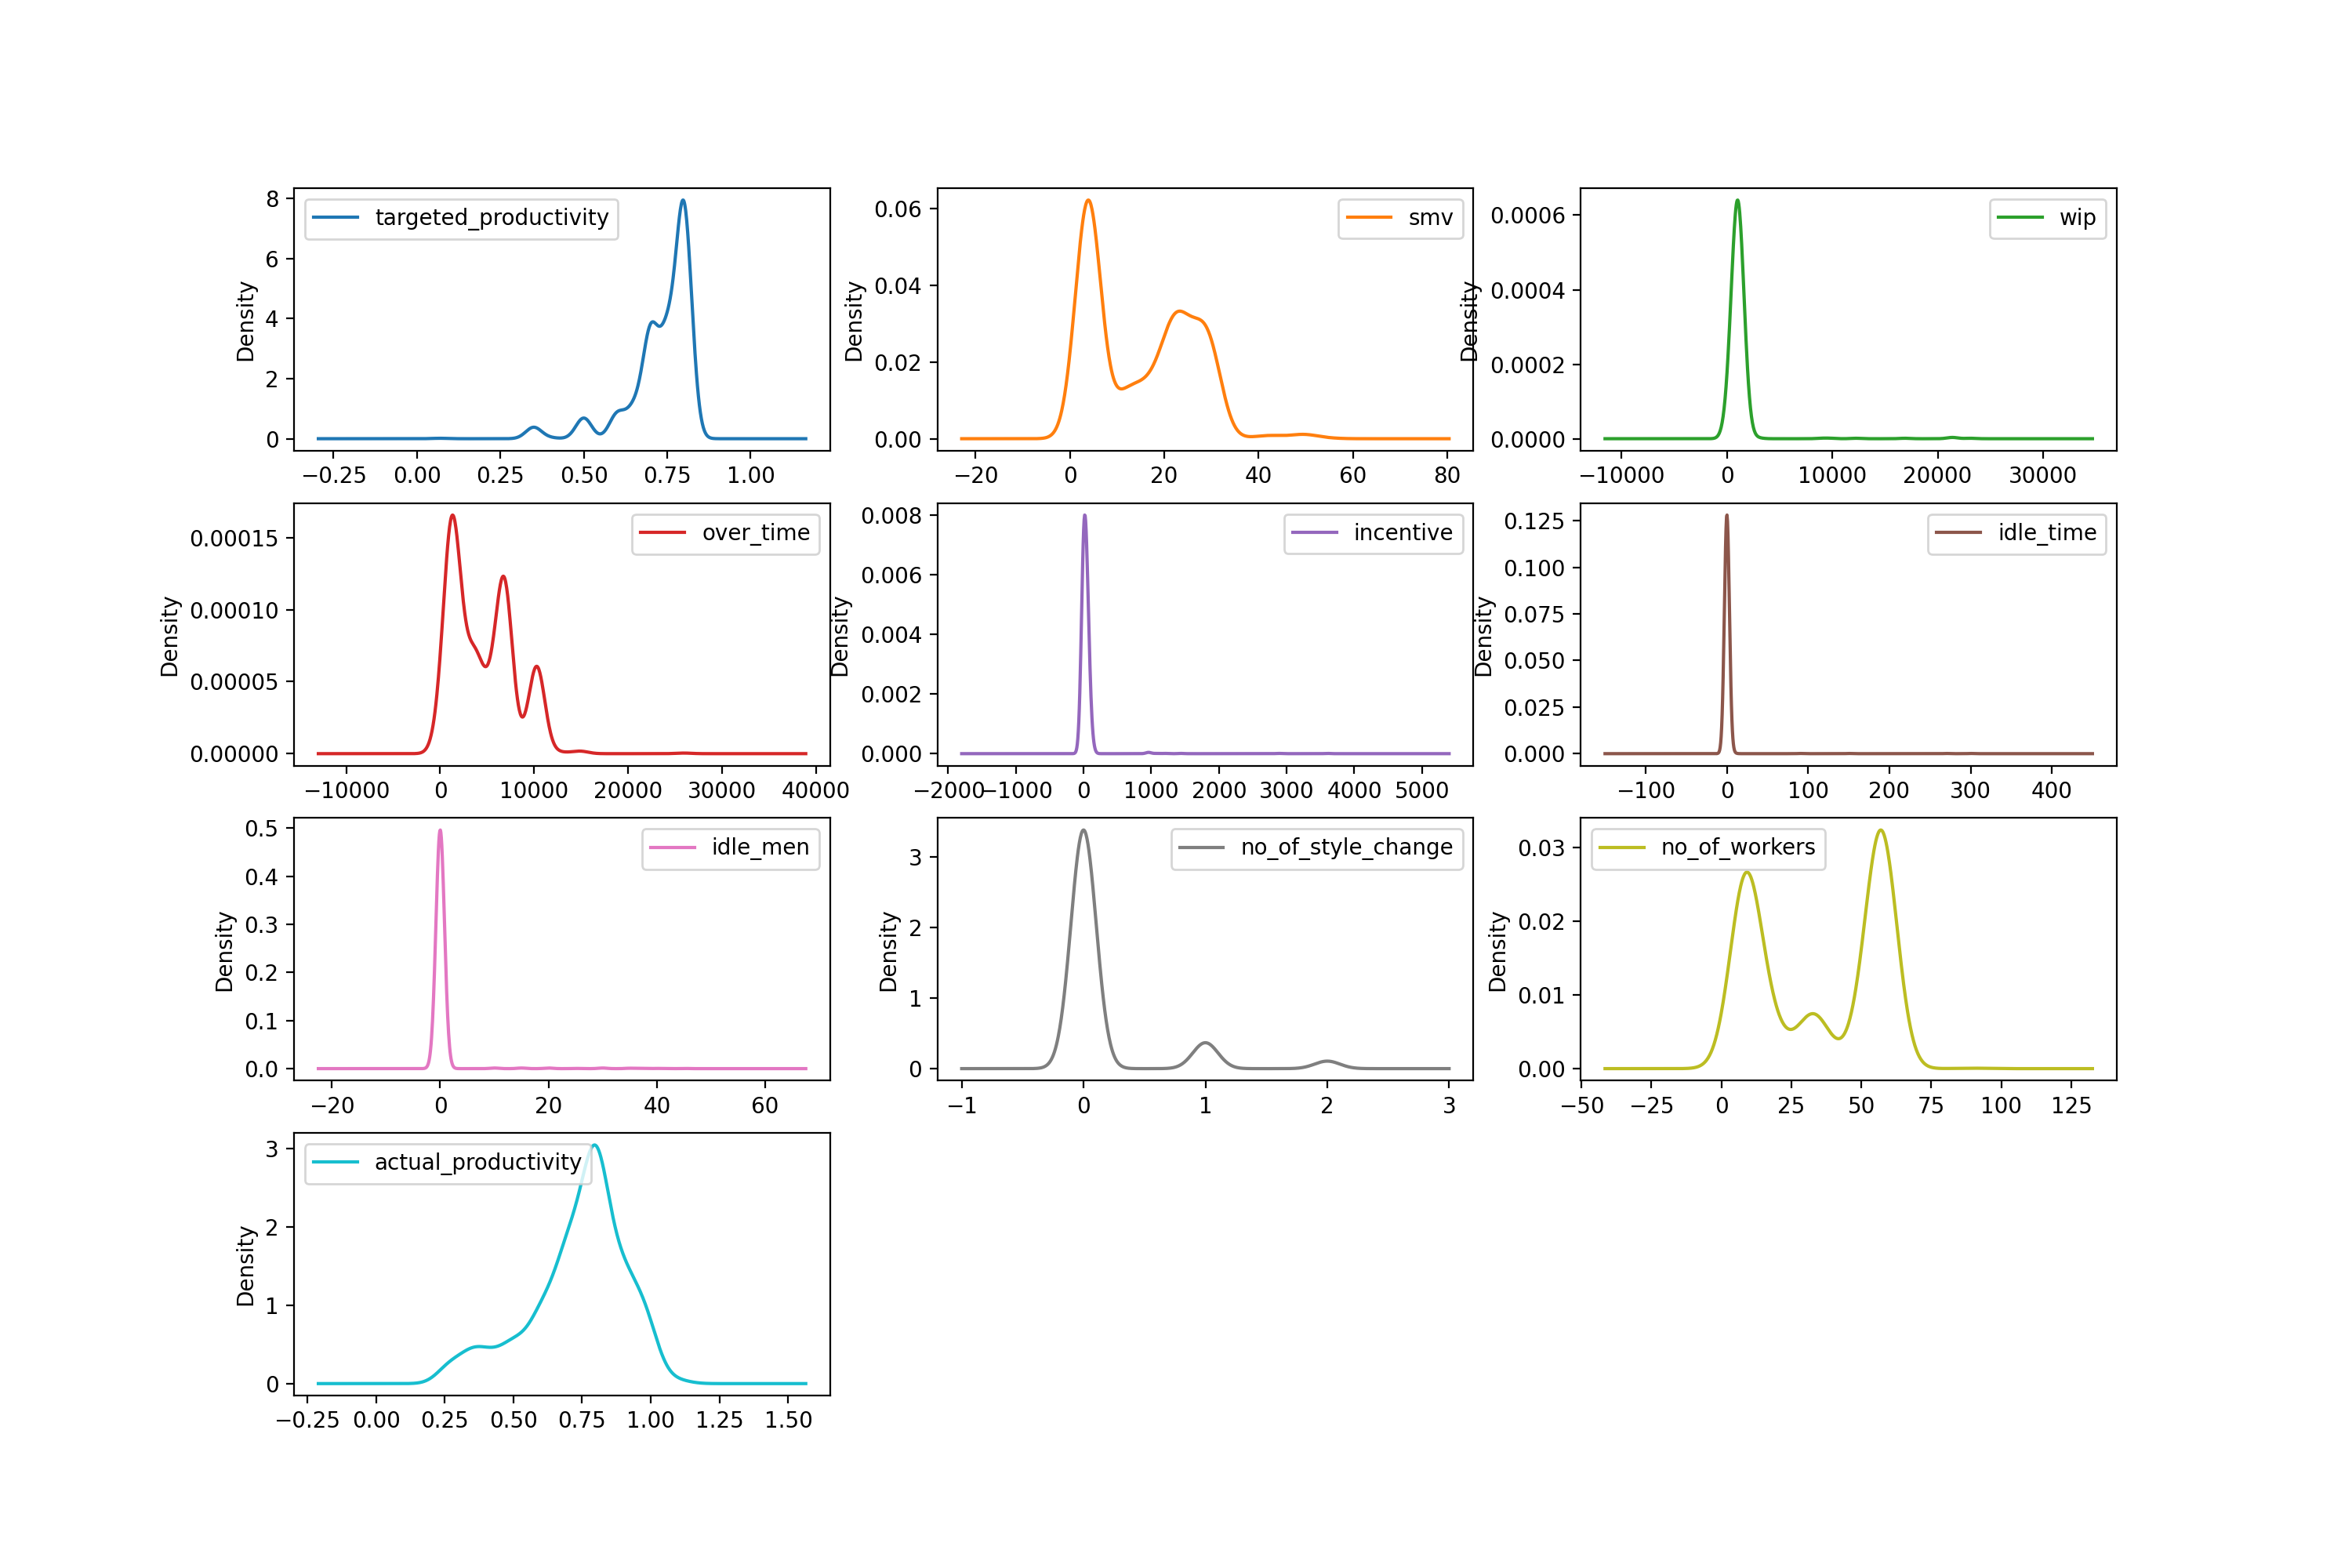

In [62]:
# Exibe a distribuição dos atributos utilizando density plot
dataset[['targeted_productivity',
         'smv',
         'wip',
         'over_time',
         'incentive',
         'idle_time',
         'idle_men',
         'no_of_style_change',
         'no_of_workers',
         'actual_productivity']].plot(kind = 'density', subplots = True, layout = (4,3), sharex = False, figsize = (15,10))
plt.show()

Text(0.5, 1.0, 'team')

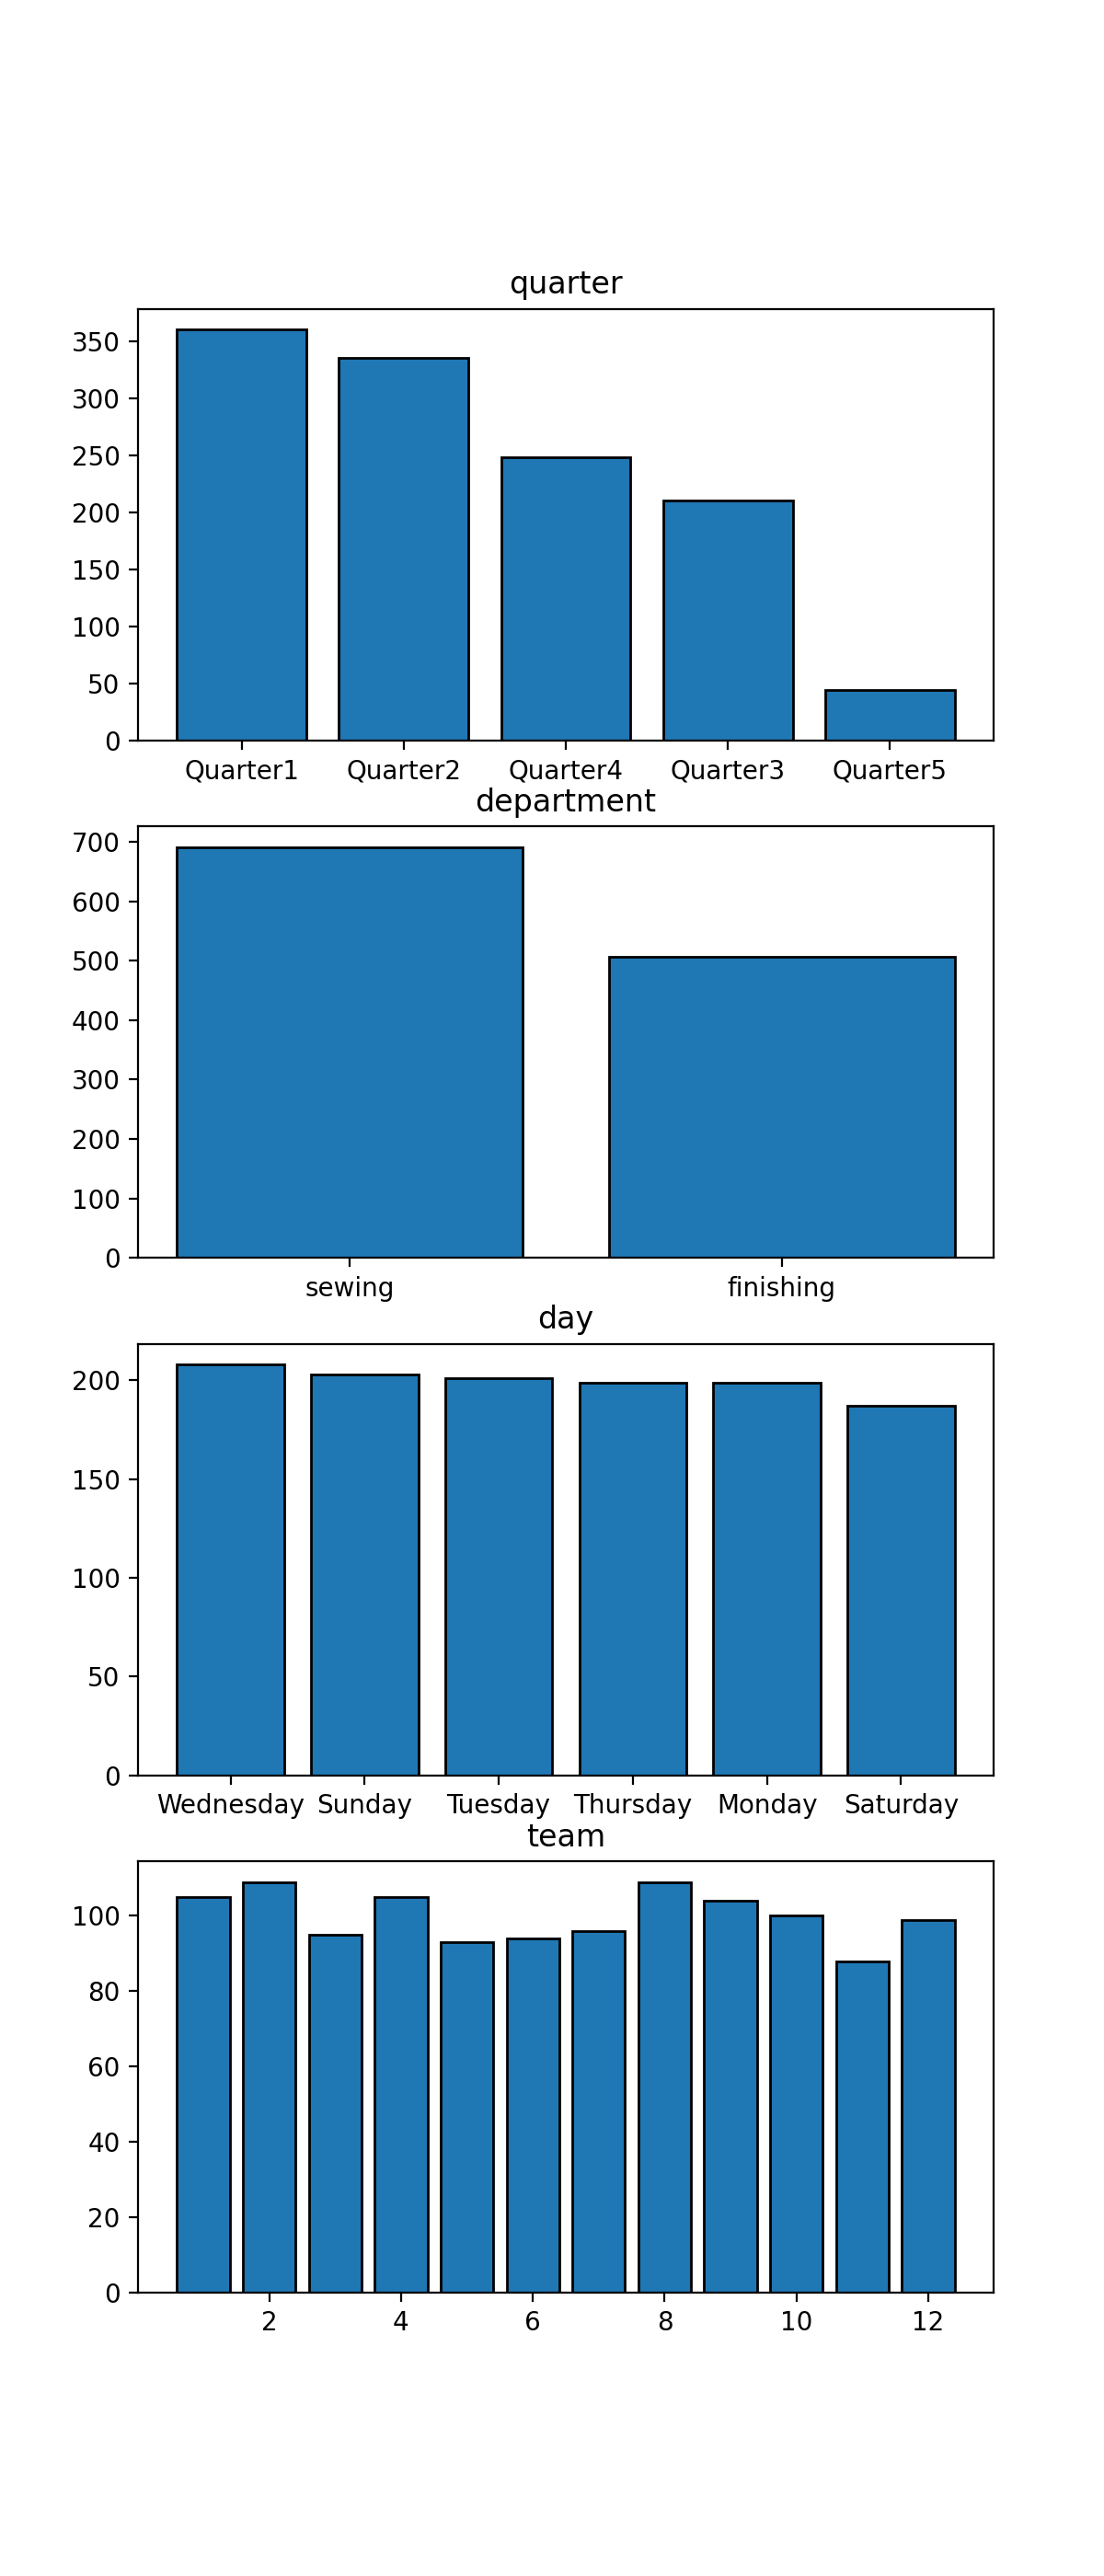

In [63]:
# Exibe a distribuição dos atributos utilizando gráficos de barra
fig, ax = plt.subplots(4,1, figsize = (6,14))

ax[0].bar(dataset['quarter'].value_counts().keys(),dataset['quarter'].value_counts(),edgecolor='black')
ax[0].set_title('quarter')

ax[1].bar(dataset['department'].value_counts().keys(),dataset['department'].value_counts(),edgecolor='black')
ax[1].set_title('department')

ax[2].bar(dataset['day'].value_counts().keys(),dataset['day'].value_counts(),edgecolor='black')
ax[2].set_title('day')

ax[3].bar(dataset['team'].value_counts().keys(),dataset['team'].value_counts(),edgecolor='black')
ax[3].set_title('team')

Avaliando os gráficos acima podemos considerar:
- A target_productivity (produtividade desejada), apresenta o valor 0.80 com maior frequência.
- O smv (tempo alocado para uma tarefa), tem prevalencia de um valor em torno de 3 minutos. O valor em torno de 20 minutos também apresenta um frequência significante.
- O wip (trabalho em progresso), tem sua concentração em torno do valor 1000.
- O over_time (quantidade de trabalho excedido por uma equipe), tem uma concentração variando entre 950 e 1500 minutos.
- O incentive (incentivo por desempenho), tem oferecimento 0 para a maior parte das instâncias.
- O idle_time (tempo de produção interrompida), é 0 na maior parte do dataset.
- O idle_men (número de trabalhadores ociosos), é 0 na maior parte do dataset. 
- O no_of_style_changes (número de mudanças no estilo), é 0 em quase a totalidade do dataset.
- O no_of_workers (número de trabalhadores por equipe), tem sua maior frequência entre 8 e 58, mas tem uma razoável variação.
- A actual_productivity (produtividade real), apresenta uma certa uniformidade em torno do valor 0.80.
- Mais da metade da produção acontece durante os dois primeiros quartos do mês.
- As atividades de produção estão distribuidas igualmente ao longo da semana.
- O departamento finishing (acabamento), tem aproximandamente mais 200 tarefas que o departamento sewing (costura).
- As 12 equipes tem uma distribuição uniforme de trabalho. As equipes 8 e 2 tem o maior número de atividades.


Exibe a correlação entre os atributos.

In [64]:
# Exibe a correlação entre os atributos do dataset
dataset[['targeted_productivity',
         'smv',
         'wip',
         'over_time',
         'incentive',
         'idle_time',
         'idle_men',
         'no_of_style_change',
         'no_of_workers',
         'actual_productivity']].corr()

,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
targeted_productivity,1.000000,-0.069489,0.062054,-0.088557,0.032768,-0.056181,-0.053818,-0.209294,-0.084288,0.421594
smv,-0.069489,1.000000,-0.037837,0.674887,0.032629,0.056863,0.105901,0.315388,0.912176,-0.122089
wip,0.062054,-0.037837,1.000000,0.022302,0.167210,-0.026299,-0.048718,-0.072357,0.030383,0.131147
over_time,-0.088557,0.674887,0.022302,1.000000,-0.004793,0.031038,-0.017913,0.059790,0.734164,-0.054206
incentive,0.032768,0.032629,0.167210,-0.004793,1.000000,-0.012024,-0.021140,-0.026607,0.049222,0.076538
idle_time,-0.056181,0.056863,-0.026299,0.031038,-0.012024,1.000000,0.559146,-0.011598,0.058049,-0.080851
idle_men,-0.053818,0.105901,-0.048718,-0.017913,-0.021140,0.559146,1.000000,0.133632,0.106946,-0.181734
no_of_style_change,-0.209294,0.315388,-0.072357,0.059790,-0.026607,-0.011598,0.133632,1.000000,0.327787,-0.207366
no_of_workers,-0.084288,0.912176,0.030383,0.734164,0.049222,0.058049,0.106946,0.327787,1.000000,-0.057991
actual_productivity,0.421594,-0.122089,0.131147,-0.054206,0.076538,-0.080851,-0.181734,-0.207366,-0.057991,1.000000


<Axes: >

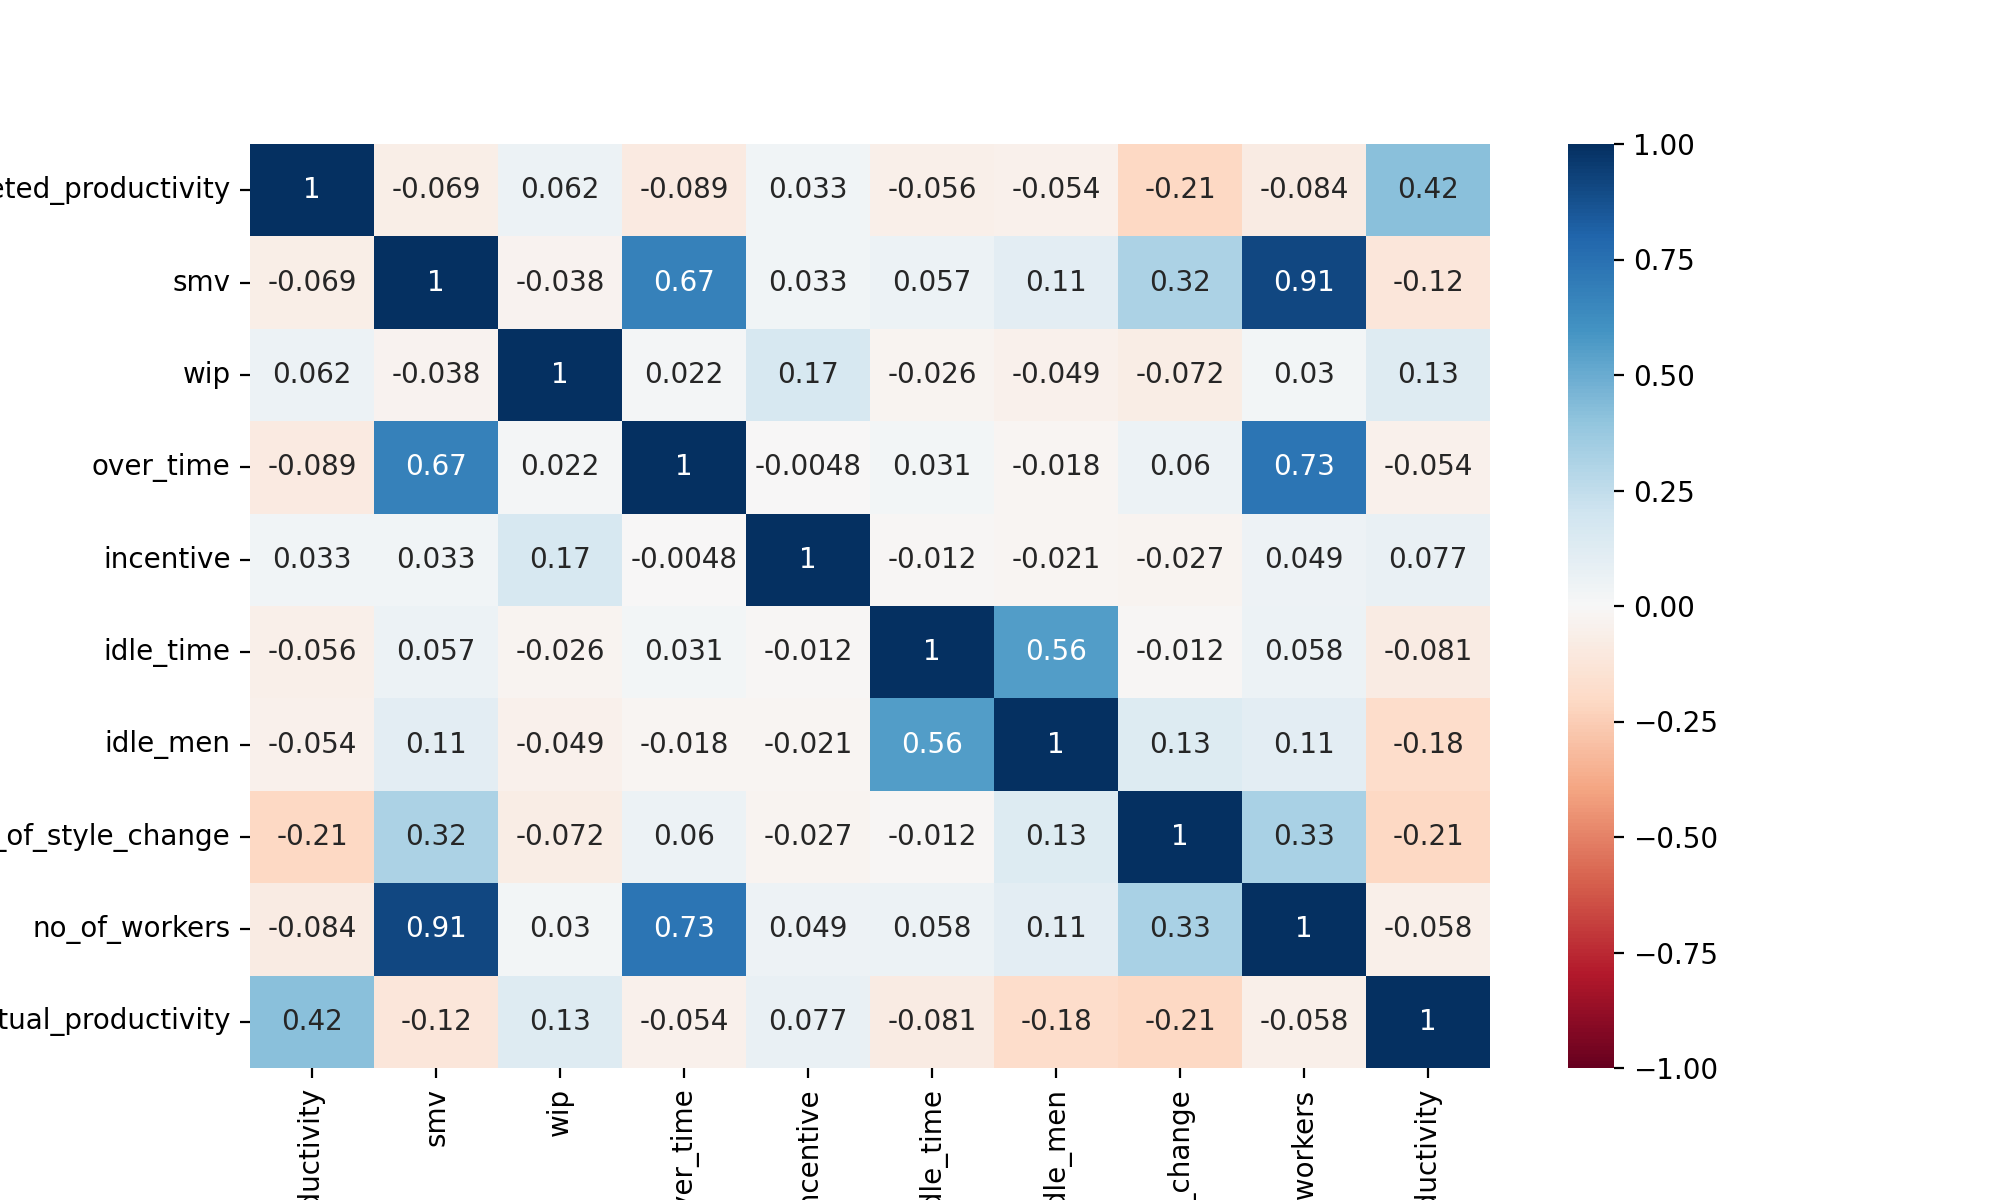

In [65]:
# Exibe a matriz de correlação
plt.figure(figsize = (10,6))
sns.heatmap(dataset[['targeted_productivity',
                     'smv',
                     'wip',
                     'over_time',
                     'incentive',
                     'idle_time',
                     'idle_men',
                     'no_of_style_change',
                     'no_of_workers',
                     'actual_productivity']].corr(), annot=True, cmap='RdBu', vmin=-1, vmax=1)

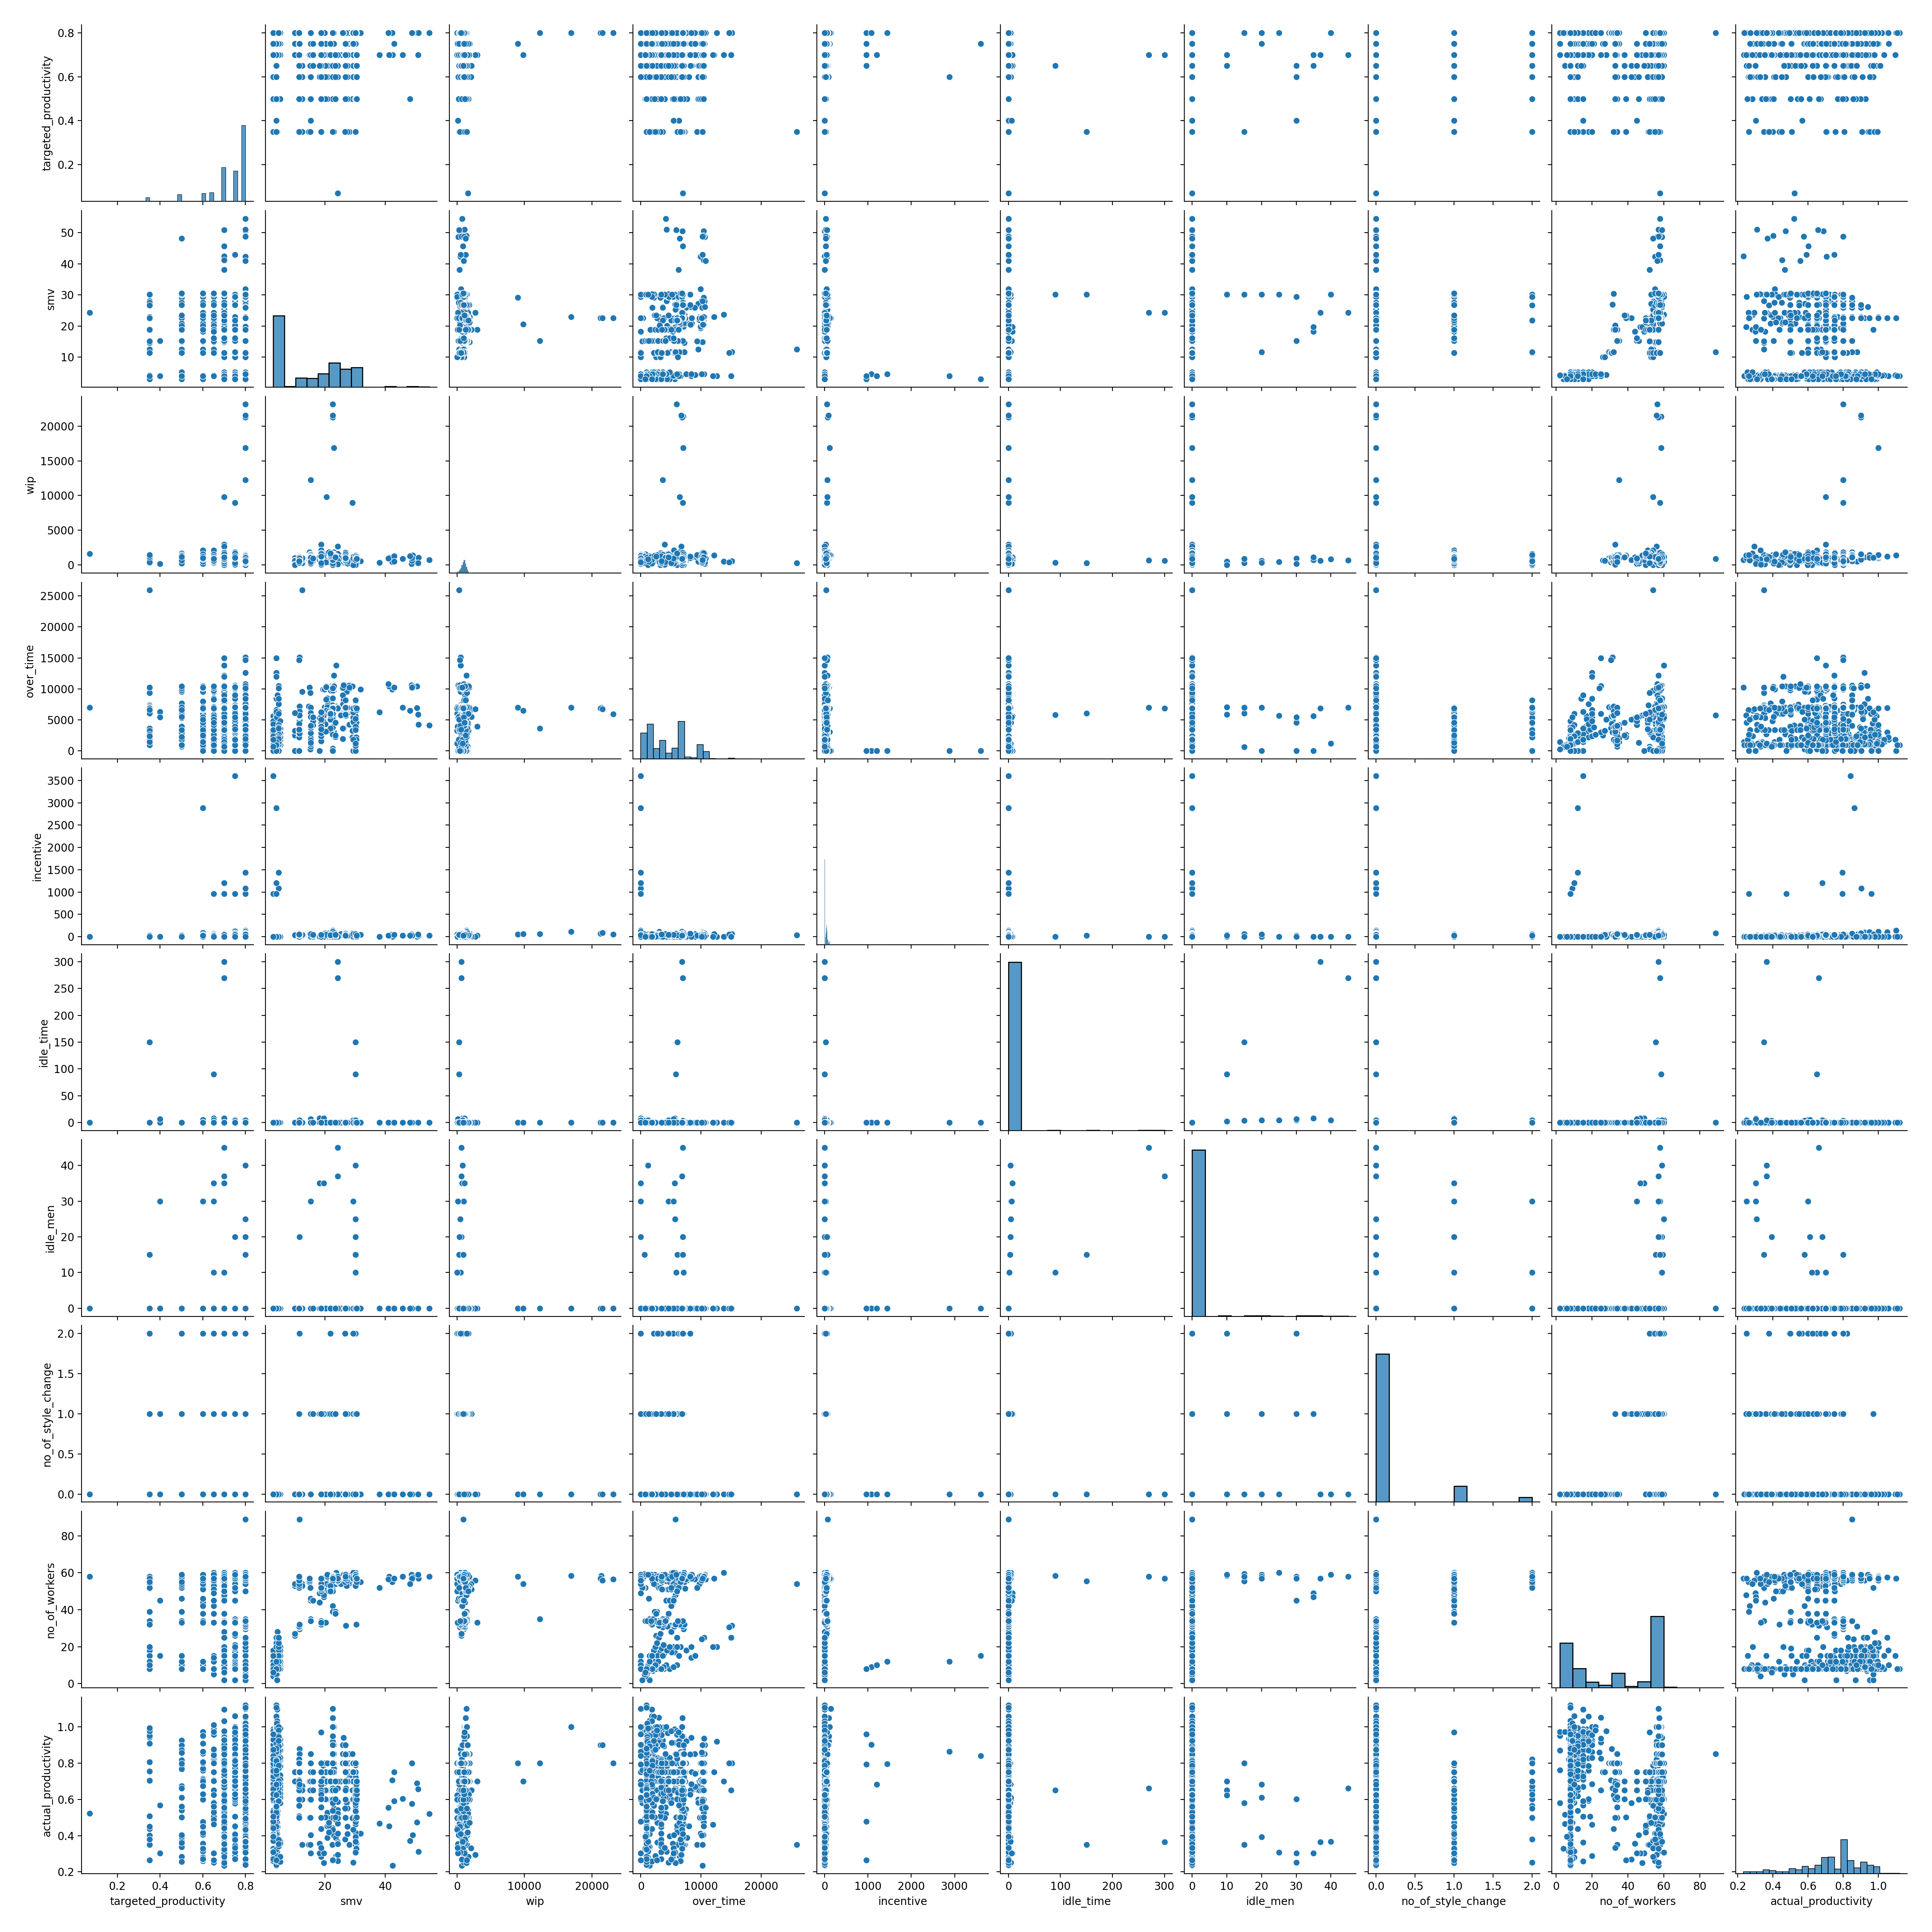

In [66]:
# Exibe o scatter plot a partir dos dados do dataset
sns.pairplot(dataset[['targeted_productivity',
                      'smv',
                      'wip',
                      'over_time',
                      'incentive',
                      'idle_time',
                      'idle_men',
                      'no_of_style_change',
                      'no_of_workers',
                      'actual_productivity']])

Avaliando o resultado da correlação entre alguns atibutos:
- Pode ser identificada uma correlação positiva (0.91) entre o atributo smv (tempo alocado para uma tarefa) e o no_of_workers (número de trabalhadores por equipe). Isto está relacionado a necessidade de um número maior de trabalhadores para as tarefas mais longas. Essa foi a correlação mais alta. Ela se justifica pois quanto maior o tempo de uma tarefa, mais trabalhadores são alocados à tarefa.
- Temos uma correlação positiva (0.67) entre o atributo smv (tempo alocado para uma tarefa) e o overtime (quantidade de trabalho excedido por uma equipe).
- Pode ser identificada uma correlação positiva (0.67) entre o atributo overtime (quantidade de trabalho excedido por uma equipe) e o no_of_workers (número de trabalhadores por equipe). Isto ocorre porque um atraso numa tarefa pode ser compensada com a alocação de mais trabalhadores à mesma.
- A correlação entre idle_time (tempo de produção interrompida) e idle_men (número de trabalhadores ociosos) tem uma correlação positiva (0.56). Esse resultado se dá porque uma linha de produção interropida leva a trabalhadores ociosos.

Exibe a relação entre o atributo actual_productivity, e os atributos day, quarter e department.

In [67]:
# Importa bibliotecas
from plotnine.data import huron
from plotnine import ggplot, aes, geom_boxplot

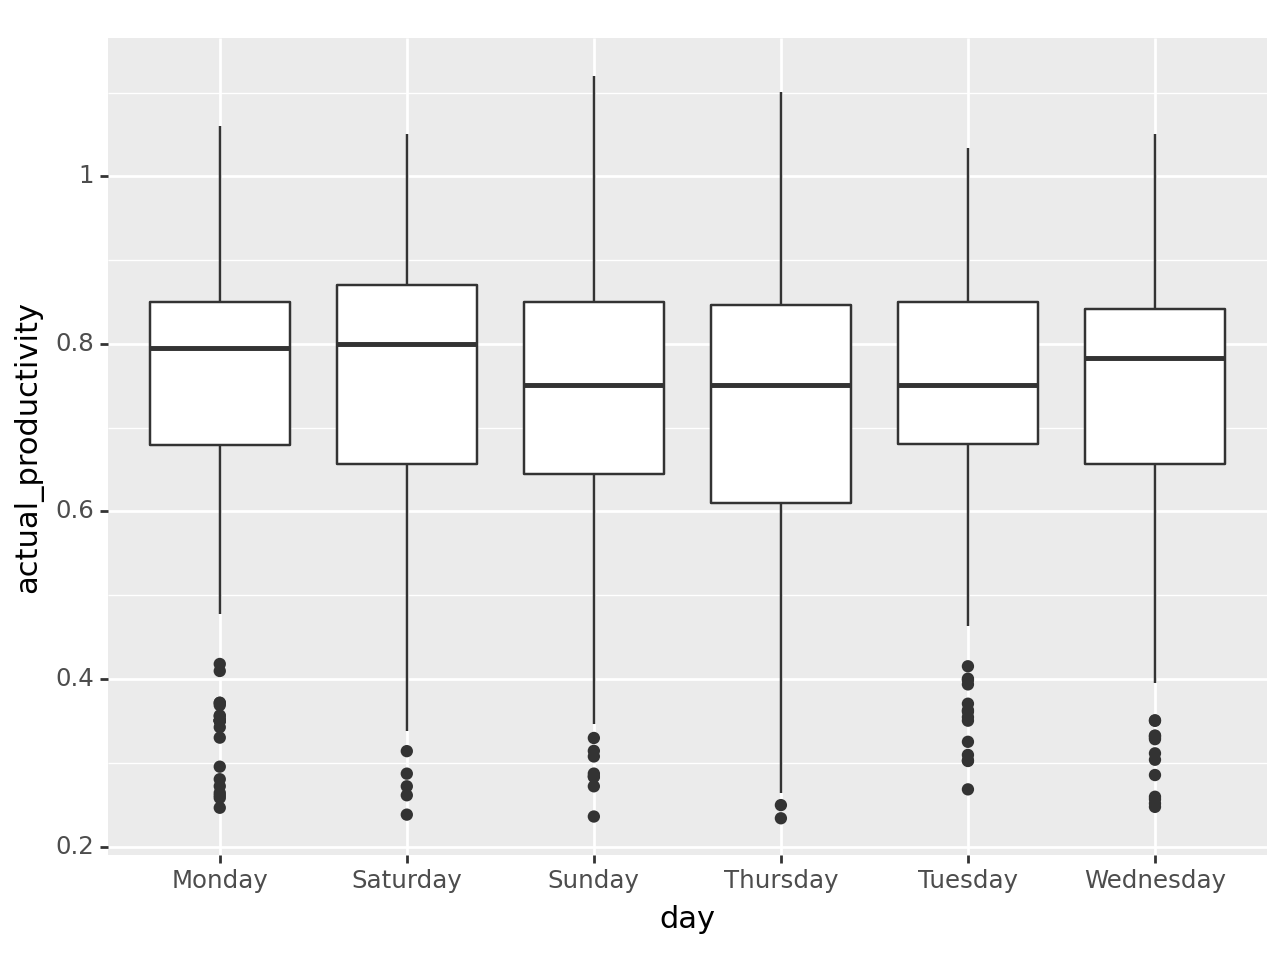

<Figure Size: (640 x 480)>

In [68]:
(
  ggplot(dataset)
  + aes(x="day", y="actual_productivity")
  + geom_boxplot()
)

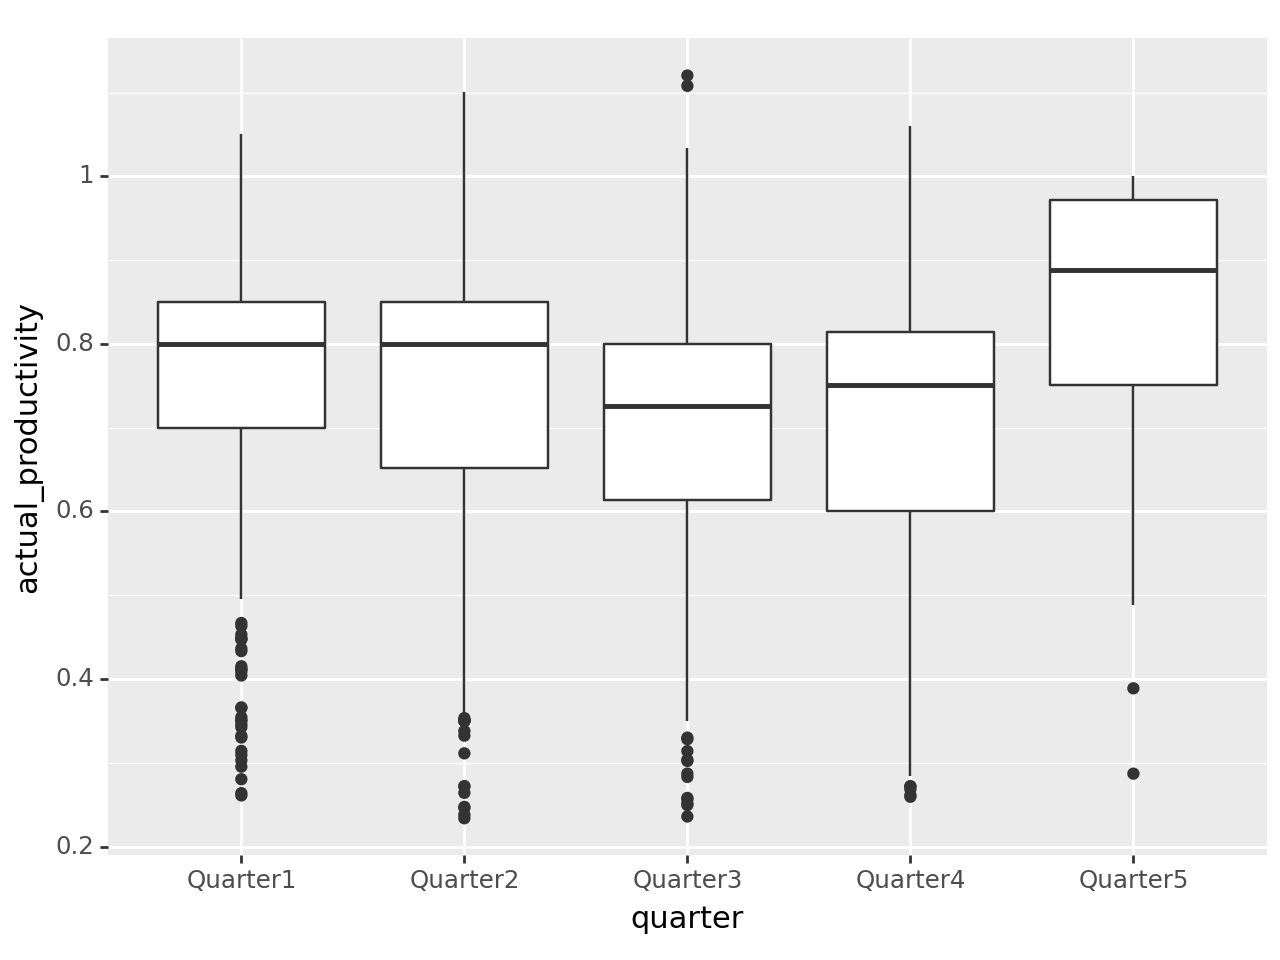

<Figure Size: (640 x 480)>

In [69]:
(
  ggplot(dataset)
  + aes(x="quarter", y="actual_productivity")
  + geom_boxplot()
)

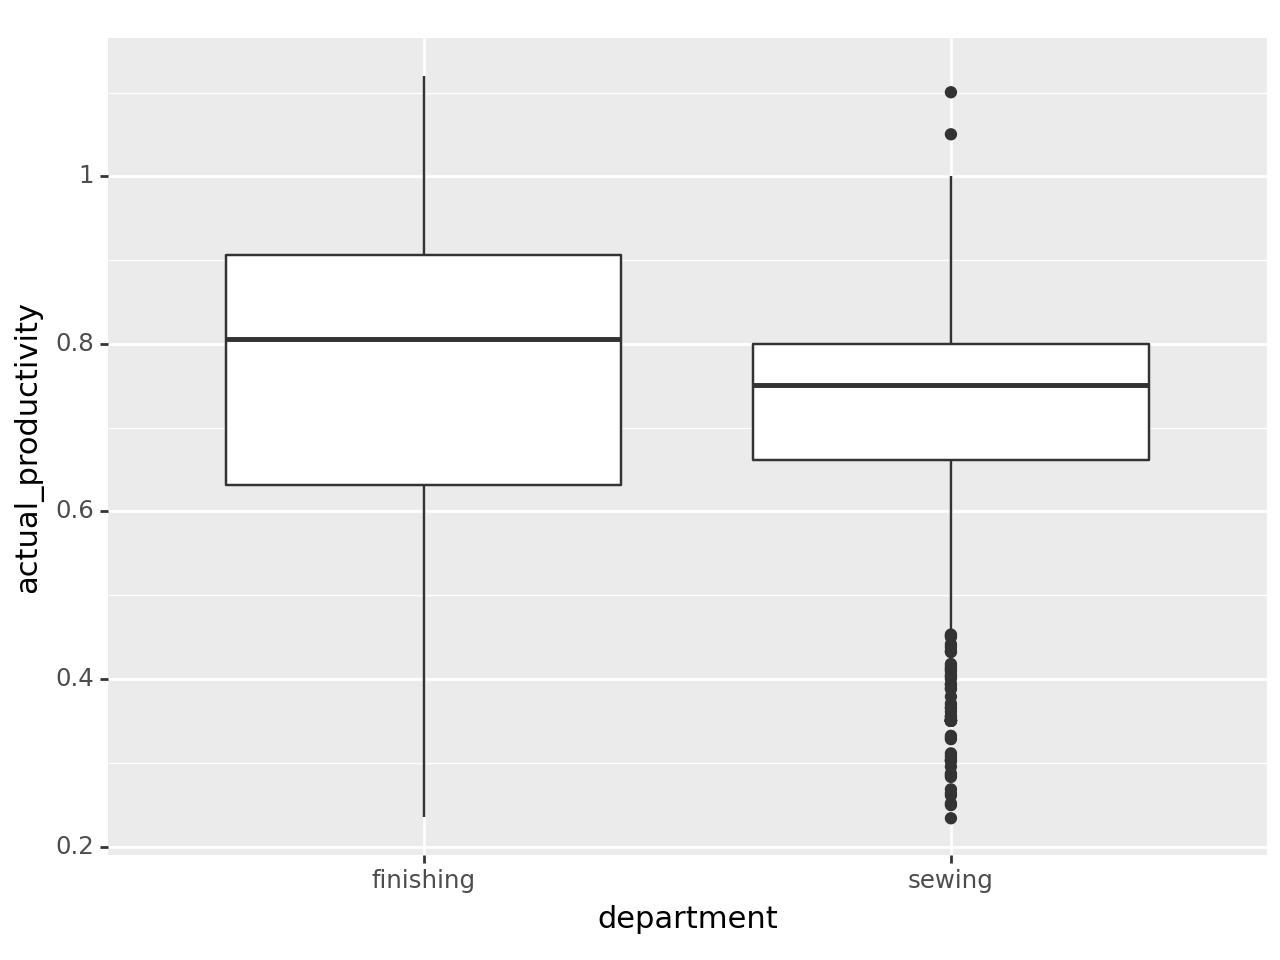

<Figure Size: (640 x 480)>

In [70]:
(
  ggplot(dataset)
  + aes(x="department", y="actual_productivity")
  + geom_boxplot()
)


Avaliando a relação entre o atributo actual_productivity, e os atributos day, quarter e department.
- A actual_productivity (produtividade desejada) é constante ao longo dos dias.
- O quinto quarter tem a maior actual_productivity.
- A actual_productivity aparenta ser bastante semelhante entre os dois departments (finishing e sewing), apesar do departamento sewing ter mais outliers.

### Pré-processamento de Dados

#### Tratamento de missings

In [71]:
# Verifica nulls no dataset
dataset.isnull().sum()

date                       0
quarter                    0
department                 0
day                        0
team                       0
targeted_productivity      0
smv                        0
wip                      506
over_time                  0
incentive                  0
idle_time                  0
idle_men                   0
no_of_style_change         0
no_of_workers              0
actual_productivity        0
dtype: int64

<Axes: >

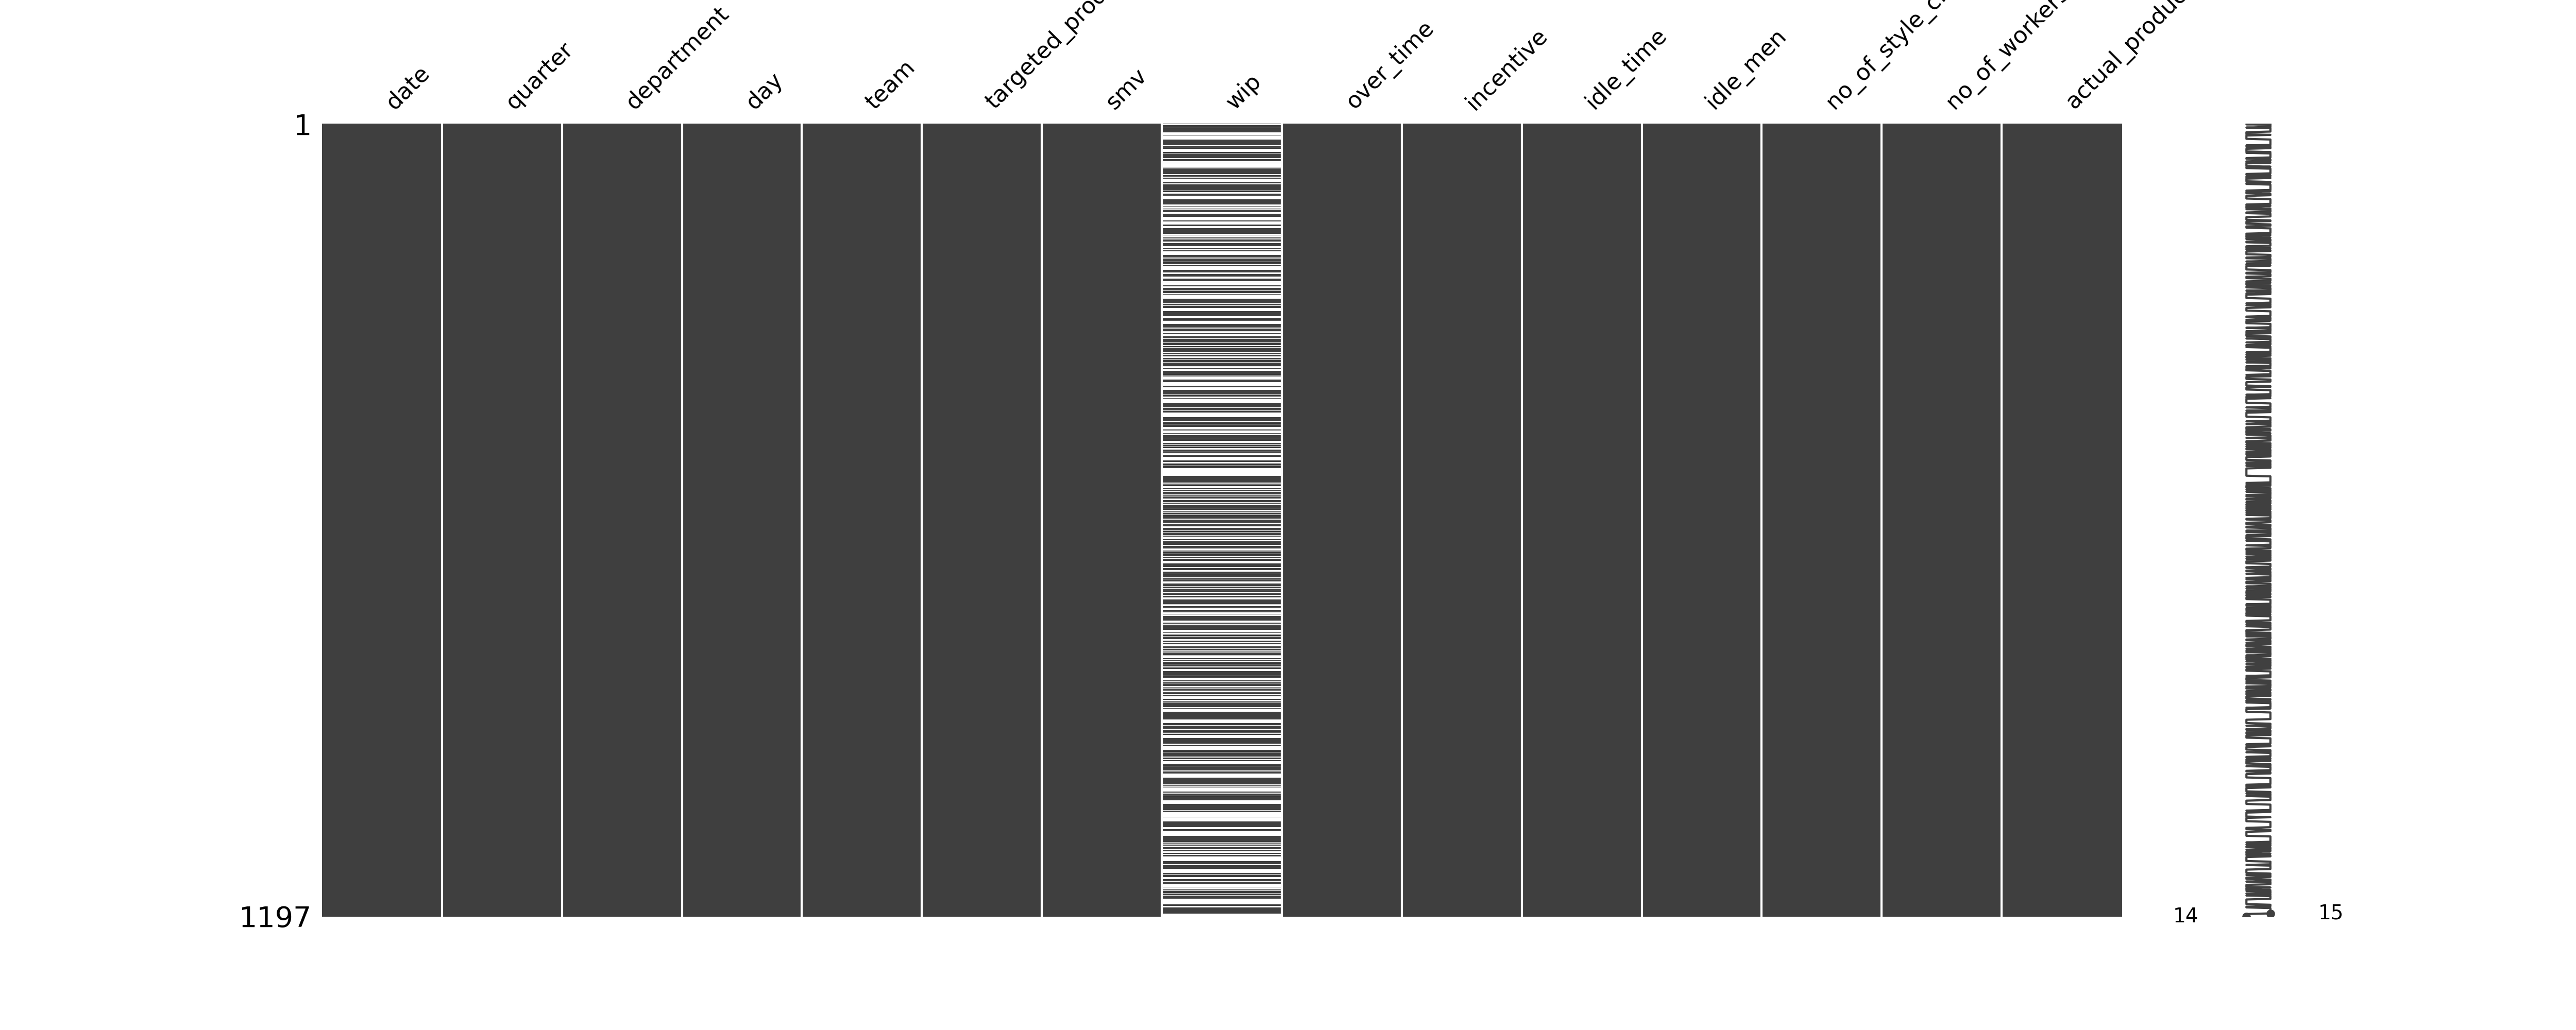

In [72]:
# Exibe visualização matricial da nulidade do dataset
ms.matrix(dataset)

In [73]:
# Substitui os NaN do atributo wip por 0
dataset['wip'].fillna(0, inplace=True)

<Axes: >

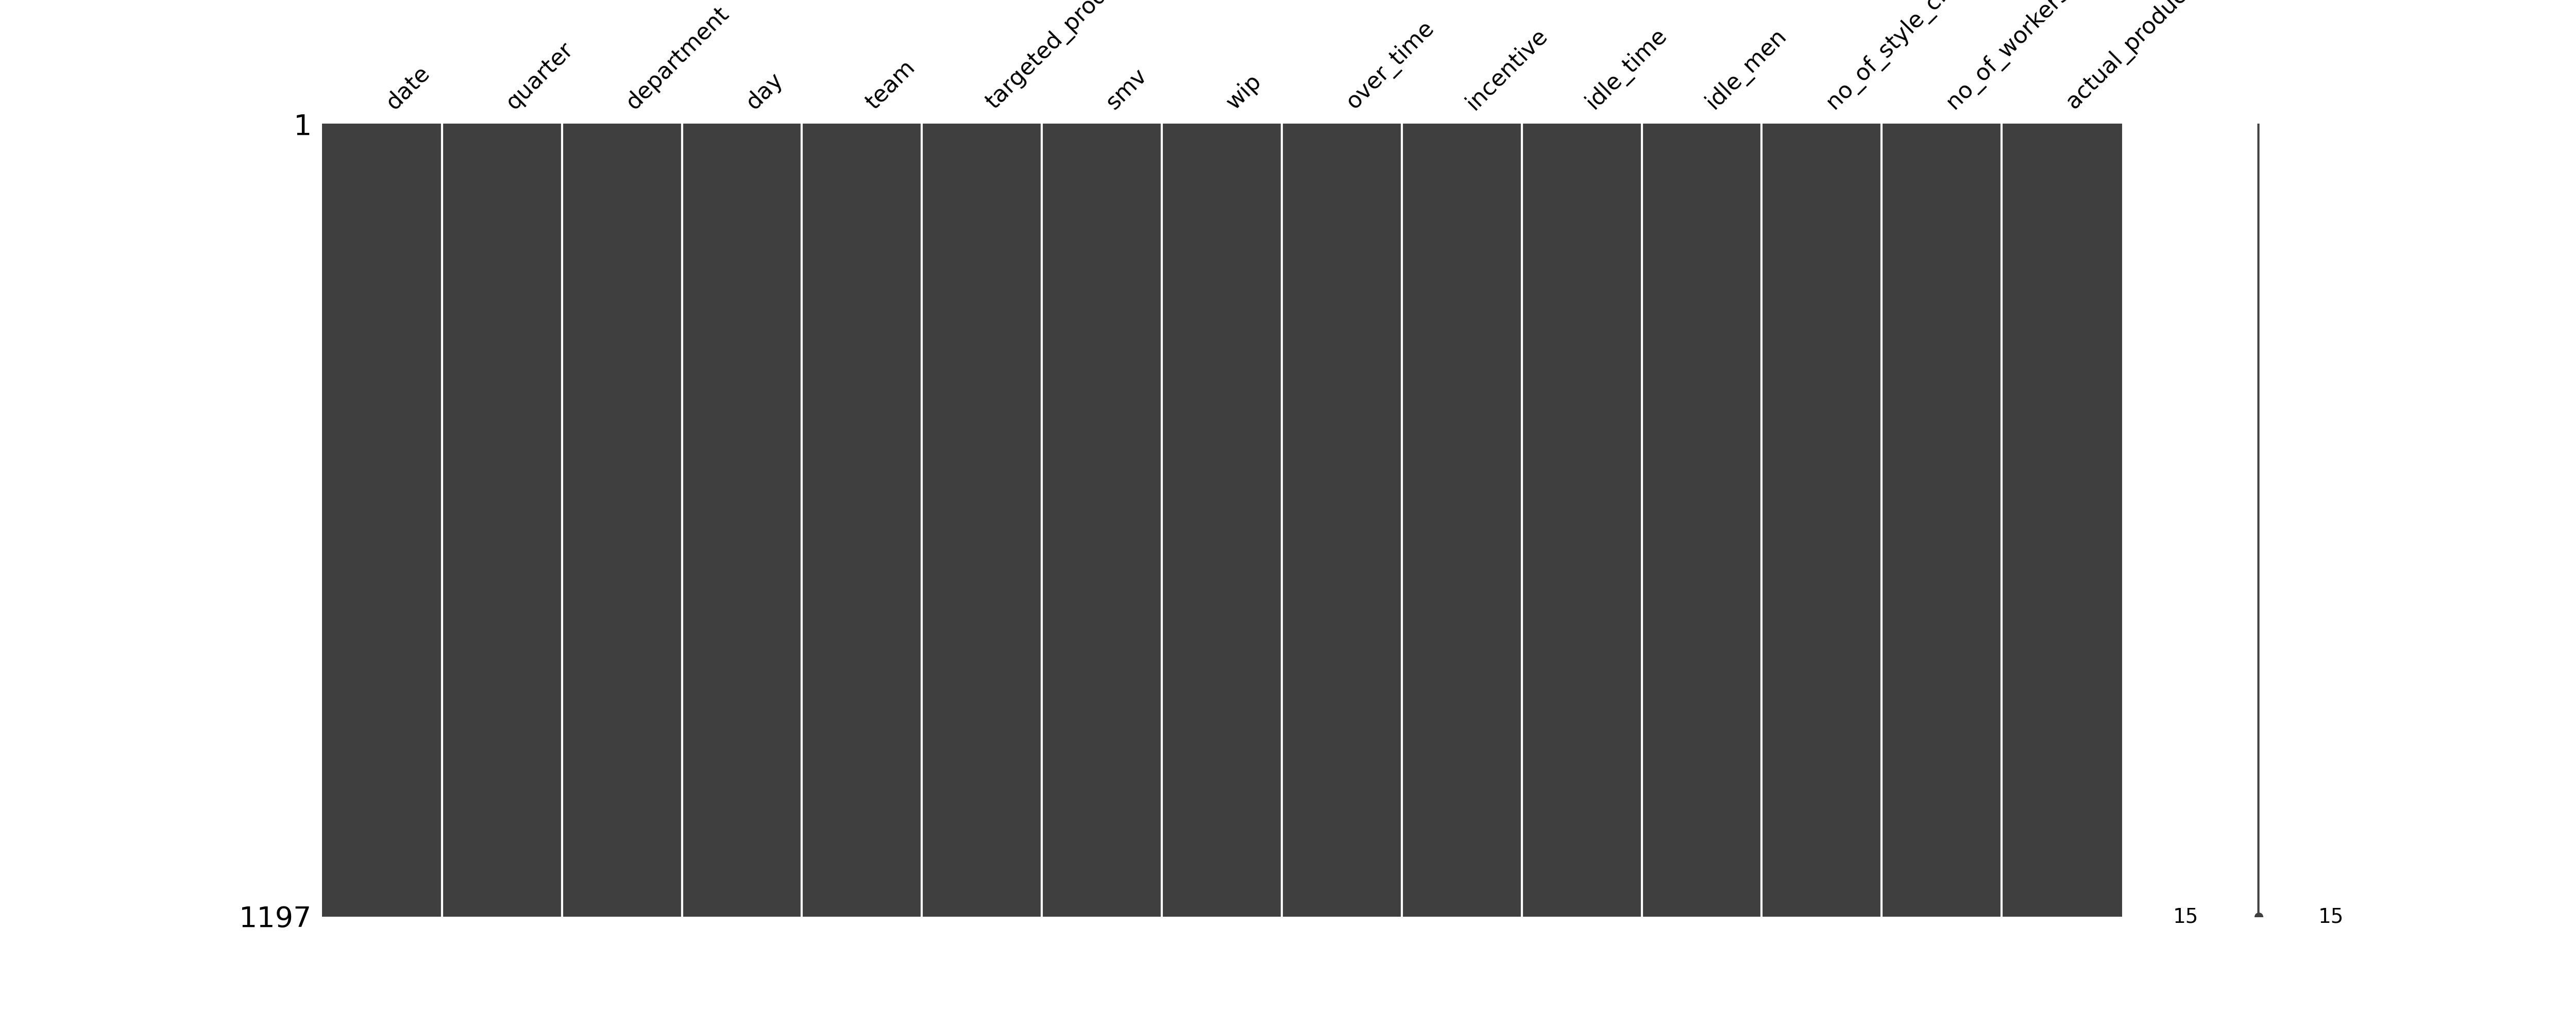

In [75]:
# Exibe visualização matricial da nulidade do dataset após a substituição das instâncias nulas do atributo wip por 0
ms.matrix(dataset)